### Importing Libraries

In [1]:
import cv2 as cv
import numpy as np

### Reading Images and Videos 

In [2]:
img=cv.imread(r"D:\Documents\Open CV Learn\2400x1600 image.jpeg")

In [3]:
cv.imshow('SS',img)
cv.waitKey(0)

-1

In [19]:
capture=cv.VideoCapture(r"D:\Documents\Open CV Learn\Video Dump\dog.mp4")
while True:
    isTrue,frame=capture.read()
    cv.imshow('Video',frame)
    if cv.waitKey(0)& 0xff==ord('d'):
        break
capture.release()
cv.destroyAllWindows()

#### Error possibility
1) You can get an (-215:Assertion failed error) if your video runs out of frames.

2) This error can also happen if you specify a wrong path.

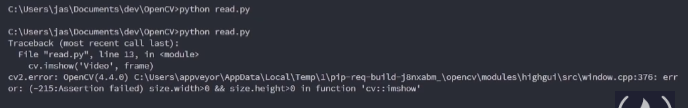

### Resizing and Rescaling Images and Cropping 

In [5]:
#function to rescale photo and video
#This function is for video that is already there.
#.shape[1] is width and .shape[0] is height
def rescaleFrame (frame,scale=0.25):
    width= int(frame.shape[1]*scale)
    height= int(frame.shape[0]*scale)
    dimensions=(width,height)
    
    return cv.resize(frame,dimensions,interpolation=cv.INTER_AREA)

In [6]:
#Rescaling Video
capture=cv.VideoCapture(r"D:\Documents\Open CV Learn\Video Dump\dog.mp4")
while True:
    isTrue,frame=capture.read()
    frame_resized=rescaleFrame(frame)
    cv.imshow('Video',frame_resized)
    if cv.waitKey(20)& 0xff==ord('d'):
        break
capture.release()
cv.destroyAllWindows()


In [7]:
#Rescaling Photo
frame_resized=rescaleFrame(img)
cv.imshow('SS',img)
cv.waitKey(0)

-1

In [8]:
#This function is for live video
def changeRes(width,height):
    capture.set(3,width) #3 and 4 basically stands for
    capture.set(4,height)#width and height respectively

In [9]:
#Cropping Image
cropped=img[10:20,20:40]
cv.imshow('Cropped',cropped)

cv.waitKey(0)

-1

### Drawing Shapes & putting Text

In [10]:
# Creating a blank numpy array to 
blank=np.zeros((500,500,3),dtype='uint8')
cv.imshow('Blank',blank)
cv.waitKey(0)

-1

In [11]:
# You can  use an image to draw
img=cv.imread(r"D:\Documents\Open CV Learn\2400x1600 image.jpeg")
cv.imshow('Cat',img)
cv.waitKey(0)

-1

In [12]:
#Paint the image a certain colour
blank[:]=0,0,0#(R,G,B)

#You can also color a certain area using the below code
#blank[200:300,300:400]=0,255,255

#To show the colour
cv.imshow('Green',blank)
cv.waitKey(0)

-1

In [13]:
#Drawing a rectangle
cv.rectangle(blank,(0,0),(250,250),(0,255,0),thickness=2)


#To fill color in Rectangle
cv.rectangle(blank,(0,0),(250,250),(0,255,0),thickness=cv.FILLED)
#thickness=-1 has the same result
cv.imshow('Rectangle',blank)
cv.waitKey(0)


-1

In [14]:
#You can also pass parameters of the rectangle like this
cv.rectangle(blank,(0,0),(blank.shape[1]//2,blank.shape[0]//2),(0,255,0),thickness=cv.FILLED)
cv.imshow('Rectangle',blank)
cv.waitKey(0)

-1

In [15]:
#Drawing a  Circle
cv.circle(blank,(blank.shape[1]//2,blank.shape[0]//2),40,(0,0,255),thickness=3)
cv.imshow('Circle',blank)
cv.waitKey(0)

-1

In [16]:
#Draw a line
cv.line(blank,(0,0),(blank.shape[1]//2,blank.shape[0]//2),(255,0,0),thickness=3)
cv.imshow('Line',blank)
cv.waitKey(0)

-1

In [17]:
#Write text on image
cv.putText(blank,'Hello',(275,275),cv.FONT_HERSHEY_TRIPLEX,1.0,(0,255,0,),2)
cv.imshow('Text',blank)
cv.waitKey(0)

-1

### 5 Essential Functions


In [18]:
#Converting an image to grayscale
gray=cv.cvtColor(img,cv.COLOR_BGR2GRAY)
cv.imshow('Gray',gray)

cv.waitKey(0)

-1

In [19]:
#Blur Image
blur=cv.GaussianBlur(img,(3,3),cv.BORDER_DEFAULT)
cv.imshow('Blur',blur)

cv.waitKey(0)

-1

In [20]:
#Edge Cascade9
canny=cv.Canny(img,125,175)
cv.imshow('Canny Edges',canny)
#The below code has blur image passed which gives less edges
canny=cv.Canny(blur,125,175)
cv.imshow('Canny Edges',canny)

cv.waitKey(0)

-1

In [21]:
#Dilating the image
dilated=cv.dilate(canny,(7,7),iterations=1)
canny=cv.Canny(blur,125,175)
cv.imshow('Dilated',dilated)

cv.waitKey(0)

-1

In [22]:
#Eroding
eroded=cv.erode(dilated,(3,3),iterations=1)
cv.imshow('Eroded',eroded)

cv.waitKey(0)

-1

### Image Transformation 

In [23]:
#Translation
def translate(img,x,y):
    transMat=np.float32([[1,0,x],[0,1,y]])
    dimensions=(img.shape[1],img.shape[0])
    return cv.warpAffine(img,transMat,dimensions)
translated=translate(img,100,100)

cv.imshow("Translated",translated)
cv.waitKey(0)

-1

In [24]:
#Rotate

def rotate(img,angle,rotPoint=None):
    (height,width)=img.shape[:2]
    if rotPoint is None:
        rotPoint=(width//2,height//2)
        
    rotMat=cv.getRotationMatrix2D(rotPoint,angle,1.0)
    dimensions=(width,height)
    return cv.warpAffine(img,rotMat,dimensions)
rotated=rotate(img,45)
cv.imshow("Rotated",rotated)

#Rotated of Rotated
#rotated_rotated=rotate(rotated,45)
#cv.imshow("Rotated",rotated_rotated)
cv.waitKey(0)

-1

In [25]:
#Flip an image
flip=cv.flip(img,0)
#0 means flipping the image by the x axis
#1 means flipping the image by the y axis
#-1 implies flipping the image by both the axes

cv.imshow("Flip",flip)
cv.waitKey(0)

-1

### Contour Detection

Useful in shape analysis and object detection

In [2]:
imag=cv.imread('cat.jpeg')

cv.imshow("Img",imag)
cv.waitKey(0)

-1

In [28]:
gray=cv.cvtColor(imag,cv.COLOR_BGR2GRAY)

blur=cv.GaussianBlur(gray,(5,5),cv.BORDER_DEFAULT)
cv.imshow('Blur',blur)

canny=cv.Canny(imag,125,175)
cv.imshow('Canny',canny)

contours,hierarchies=cv.findContours(canny,cv.RETR_LIST,cv.CHAIN_APPROX_NONE)
print(f'{len(contours)}countour(s) found!')
#RETR_TREE for hierarchical contours
#RETR_LIST for all contours
#RETR_External for all external contours

#The parameter after RETR_List basically is for specifying how we want to approximate the contours
#CHAIN_APPROX_NONE does nothing and returns all of the contours
#CHAIN_APPROX_SIMPLE it compresses all the contours into simpler ones which make sense

cv.waitKey(0)

235countour(s) found!


-1

In [11]:
#Another way

ret,thresh=cv.threshold(gray,125,255,cv.THRESH_BINARY)
cv.imshow('Thresh',thresh)
contours,hierarchies=cv.findContours(thresh,cv.RETR_LIST,cv.CHAIN_APPROX_SIMPLE)
print(f'{len(contours)}countour(s) found!')

cv.waitKey(0)

77countour(s) found!


-1

#### Drawing Contours-

In [29]:
blank=np.zeros(imag.shape,dtype='uint8')
cv.imshow('Blank',blank)

cv.waitKey(0)

-1

In [31]:

cv.drawContours(blank,contours,-1,(0,0,255),1)
#parameters-(image to draw on,-1 specifies draw all contours,bgr colour,thickness)

cv.imshow('Contours Drawn',blank)

cv.waitKey(0)

-1

First finding the edge cascade and then finding the contours is better than thresholding and finding the contours as the type of simple thresholding done here has its own disadvantages.

### Color Spaces 

In [34]:
#BGR to Grayscale
gray=cv.cvtColor(imag,cv.COLOR_BGR2GRAY)

cv.imshow("Gray",gray)
cv.waitKey(0)

-1

In [36]:
#BGR to HSV
hsv=cv.cvtColor(imag,cv.COLOR_BGR2HSV)

cv.imshow("HSV",hsv)
cv.waitKey(0)

-1

In [37]:
#BGR to L*a*b
lab=cv.cvtColor(imag,cv.COLOR_BGR2LAB)

cv.imshow("LAB",lab)
cv.waitKey(0)

-1

In [43]:
#BGR to RGB
rgb=cv.cvtColor(imag,cv.COLOR_BGR2RGB)

cv.imshow("RGB",rgb)
cv.waitKey(0)

-1

####  Drawbacks
1) You cannot convert grayscale directly to HSV. You need to first convert it to BGR and then to HSV

In [46]:
#LAB to BGR
bgr=cv.cvtColor(lab,cv.COLOR_LAB2BGR)

cv.imshow("BGR",bgr)
cv.waitKey(0)

-1

#### Color Space Error using OpenCV
OpenCV uses BGGR Color Space which is not the case with other libraries such as matplotlib which uses RGB as the standard.
Example given below:-

In [9]:
import matplotlib.pyplot as plt

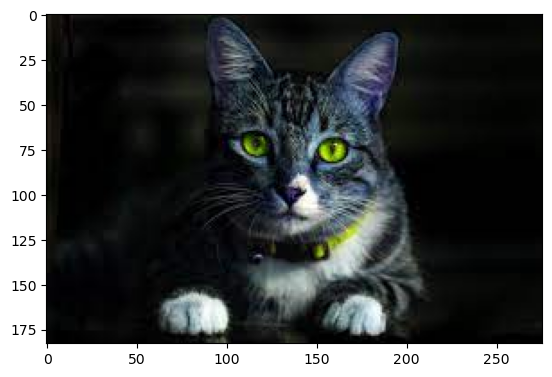

In [42]:
plt.imshow(imag)
plt.show()

### Color Channels 

In [53]:
#Splitting Color channel into corresponding colors
b,g,r=cv.split(imag)
cv.imshow('Blue',b)
cv.imshow('Green',g)
cv.imshow('Red',r)

cv.waitKey(0)

print(imag.shape)
print(b.shape)
print(g.shape)
print(r.shape)


(183, 276, 3)
(183, 276)
(183, 276)
(183, 276)


In [55]:
#merge colors into one image
merged=cv.merge([b,g,r])
cv.imshow('Merged',merged)

cv.waitKey(0)

-1

In [57]:
#Showing distinct color channels
blank=np.zeros(imag.shape[:2],dtype='uint8')
blue=cv.merge([b,blank,blank])
green=cv.merge([blank,g,blank])
red=cv.merge([blank,blank,r])

cv.imshow('Blue',blue)
cv.imshow('Green',green)
cv.imshow('Red',red)

cv.waitKey(0)

-1

### Blurring Techniques

In [3]:
#Averaging
#In averaging, a kernel of specified size like 7,7 is
#made on the image and the average of all the 7*7 pixel
#intensity is taken and then given to all the pixels
average=cv.blur(imag,(3,3))

cv.imshow('Average Blur',average)
cv.waitKey(0)

-1

In [4]:
#Gaussian Blur
#It is same as averaging but in this pixels are given
#weight and then their average is calculated
gauss=cv.GaussianBlur(imag,(3,3),0)

cv.imshow('Gaussian Blur',gauss)
cv.waitKey(0)

-1

In [6]:
#Median Blur
#It is same as averaging but it uses median value of all
#the values given. Median Blurring is more effective in 
#reducing noise in an image as compared to the previous
#two methods
median=cv.medianBlur(imag,3)

cv.imshow('Median Blur',median)
cv.waitKey(0)

-1

In [11]:
#Bilateral Blurring
#Bilateral blurring applies blurring but retains edges
bilateral=cv.bilateralFilter(imag,10,50,30)


cv.imshow('Bilateral Blur',bilateral)
cv.waitKey(0)

-1

### Bitwise Operators 

In [18]:
blank=np.zeros((400,400),dtype='uint8')
rectangle=cv.rectangle(blank.copy(),(30,30),(370,370),255,-1)
circle=cv.circle(blank.copy(),(200,200),200,255,-1)

cv.imshow('Rectangle',rectangle)
cv.imshow('Circle',circle)

-1

In [ ]:
#Bitwise AND -->Intersecting Regions
bitwise_and=cv.bitwise_and(rectangle,circle)

cv.imshow('Bitwise And',bitwise_and)
cv.waitKey(0)

In [19]:
#Bitwise OR -->Both intersecting and not intersecting
bitwise_or=cv.bitwise_or(rectangle,circle)

cv.imshow('Bitwise OR',bitwise_or)
cv.waitKey(0)

-1

In [20]:
#Bitwise XOR -->Only Not Intersecting
bitwise_xor=cv.bitwise_xor(rectangle,circle)

cv.imshow('Bitwise XOR',bitwise_xor)
cv.waitKey(0)

-1

In [ ]:
#Bitwise NOT 
bitwise_not=cv.bitwise_not(rectangle)

cv.imshow('Bitwise Not',bitwise_not)
cv.waitKey(0)

### Masking 

In [7]:
blank=np.zeros(imag.shape[:2],dtype='uint8')
mask=cv.circle(blank,(imag.shape[1]//2,imag.shape[0]//2)
               ,75,255,-1)

cv.imshow('Mask',mask)
cv.waitKey(0) 

-1

In [8]:
masked=cv.bitwise_and(imag,imag,mask=mask)
cv.imshow('Masked Image',masked)

cv.waitKey(0)

-1

In [ ]:
#You can create weird shapes by and operation of circle
#,rectangle etc and then use that as a mask

### Histogram Computation 

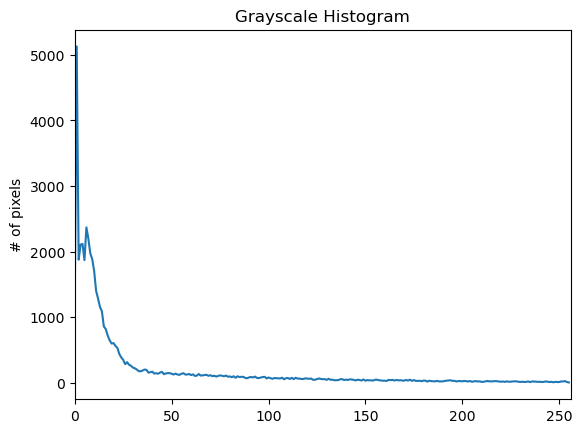

-1

In [11]:
#Grayscale Histogram
gray=cv.cvtColor(imag,cv.COLOR_BGR2GRAY)
cv.imshow('Gray',gray)

gray_hist=cv.calcHist([gray],[0],None,[256],[0,256])
plt.figure()
plt.title('Grayscale Histogram')
plt.ylabel('Bins')
plt.ylabel('# of pixels')
plt.plot(gray_hist)
plt.xlim([0,256])
plt.show()

cv.waitKey(0)

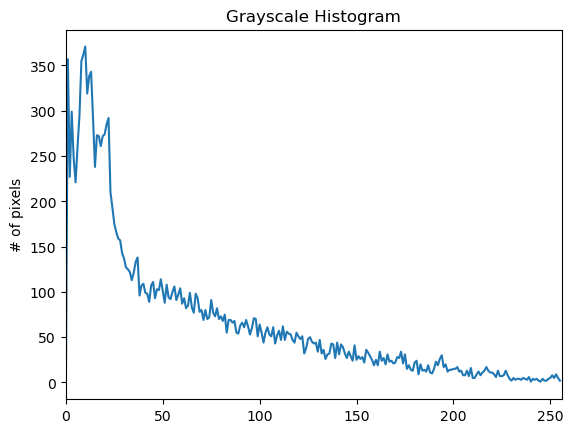

-1

In [12]:
#Grayscale Histogram for masked image
blank=np.zeros(imag.shape[:2],dtype='uint8')

circle=cv.circle(blank,(imag.shape[1]//2,imag.shape[0]//2)
               ,75,255,-1)
mask=cv.bitwise_and(gray,gray,mask=circle)

gray_hist=cv.calcHist([gray],[0],mask,[256],[0,256])
plt.figure()
plt.title('Grayscale Histogram')
plt.ylabel('Bins')
plt.ylabel('# of pixels')
plt.plot(gray_hist)
plt.xlim([0,256])
plt.show()

cv.imshow('Mask',mask)

cv.waitKey(0)

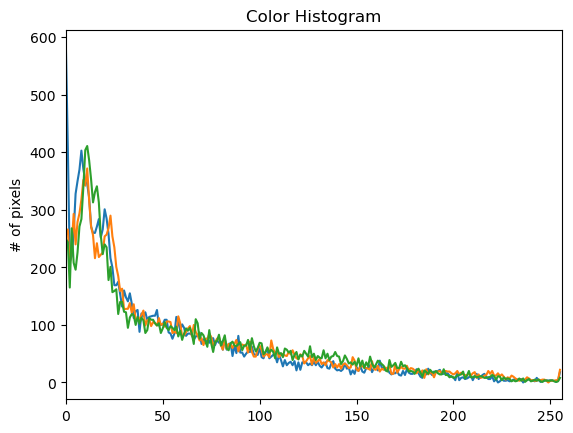

In [16]:
#Color Histogram
circle=cv.circle(blank,(imag.shape[1]//2,imag.shape[0]//2)
               ,75,255,-1)
mask=cv.bitwise_and(gray,gray,mask=circle)

plt.figure()
plt.title('Color Histogram')
plt.ylabel('Bins')
plt.ylabel('# of pixels')
colors=('b','g','r')
for i,col in enumerate(colors):
    hist=cv.calcHist([imag],[i],mask,[256],[0,256])
    plt.plot(hist)
    plt.xlim([0,256])
plt.show()    


### Thresholding 

In [22]:
#Simple Thresholding
gray=cv.cvtColor(imag,cv.COLOR_BGR2GRAY)

threshold,thresh=cv.threshold(gray,90,255,cv.THRESH_BINARY)
cv.imshow('Simple Threshold',thresh)

cv.waitKey(0)

-1

In [27]:
#Inverse Simple Thresholding
threshold, thresh_inv=cv.threshold(gray,60,255,cv.THRESH_BINARY_INV)
cv.imshow('Simple Threshold Inverse',thresh_inv)

cv.waitKey(0)

-1

In [48]:
#Adaptive Thresholding
#In simple thresholding, we were manually entering the 
#threshold value, but in more advanced CV we need to 
#let the computer decide the mode optimised threshold value
adaptive_thresh=cv.adaptiveThreshold(gray,255,cv.ADAPTIVE_THRESH_MEAN_C,cv.THRESH_BINARY,15,12)
cv.imshow('Adaptive Thresholding',adaptive_thresh)

cv.waitKey(0)

-1

### Edge Detection 

In [52]:
#Laplacian
gray=cv.cvtColor(imag,cv.COLOR_BGR2GRAY)

lap=cv.Laplacian(gray,cv.CV_64F)
lap=np.uint8(np.absolute(lap))

cv.imshow('laplacian',lap) 
cv.waitKey(0)

-1

In [55]:
#Sobel
sobelx=cv.Sobel(gray,cv.CV_64F,1,0)
sobely=cv.Sobel(gray,cv.CV_64F,0,1)
combined_sobel=cv.bitwise_or(sobelx,sobely)
cv.imshow('Sobel X',sobelx)
cv.imshow('Sobel Y',sobely)
cv.imshow('Combined Sobel',combined_sobel)
cv.waitKey(0)

-1

### Face Detection with Haar Cascades
It is really sensitive to noise in the data

In [2]:
image=cv.imread('group.jpeg')
cv.imshow('Person',image)
cv.waitKey(0)

-1

In [3]:
gray=cv.cvtColor(image,cv.COLOR_BGR2GRAY)

cv.imshow('Gray Person',gray)
cv.waitKey(0)

-1

In [4]:
#Reading the XML file for face detection 
haar_cascade=cv.CascadeClassifier('haar_face.xml')

In [5]:
#Detecting Face
faces_rect=haar_cascade.detectMultiScale(gray,scaleFactor=1.1,minNeighbors=2)
print(f'Number of faces found={len(faces_rect)}')

Number of faces found=5


In [6]:
for (x,y,w,h) in faces_rect:
    cv.rectangle(image,(x,y),(x+w,y+h),(0,255,0),thickness=2)
cv.imshow('Detected Faces',image)    
cv.waitKey(0)

-1

### Face Recognition Model

In [7]:
import os

In [9]:
people=['Ben Affleck','Elton John']
DIR=r"C:\Users\shanu\My Notebooks and Datasets\OpenCV-Reference-Notes\Face Recognition data"

In [4]:
#function to get the files names directly
p=[]
for i in os.listdir(r"C:\Users\shanu\My Notebooks and Datasets\OpenCV-Reference-Notes\Face Recognition data"):
    p.append(i)
print(p)

['Ben Affleck', 'Elton John']


In [8]:
#Function to take the images input and store it as integer values
features=[]
labels=[]
def create_train():
    for person in people:
        path=os.path.join(DIR,person)
        label=people.index(person)
        for img in os.listdir(path):
            img_path=os.path.join(path,img)
            
            img_array=cv.imread(img_path)
            gray=cv.cvtColor(img_array,cv.COLOR_BGR2GRAY)
            
            faces_rect=haar_cascade.detectMultiScale(gray,scaleFactor=1.3,minNeighbors=1)
            
            for(x,y,w,h) in faces_rect:
                faces_roi=gray[y:y+h,x:x+w]
                features.append(faces_roi)
                labels.append(label)
create_train()           

In [18]:
face_recognizer=cv.face.LBPHFaceRecognizer_create()

features=np.array(features,dtype='object')
labels=np.array(labels)

#Train the Recognizer on the features list ans the labels list
face_recognizer.train(features,labels)
print('Training Done')

face_recognizer.save('face_trained.yml')
np.save('features.npy',features)
np.save('labels.npy',labels)

Training Done


In [ ]:
#Face Recognition
#features=np.load('features.npy')
#labels=np.load('labels.npy')

face_recognizer=cv.face.LBPHFaceRecognizer_create()
face_recognizer.read('face_trained.yml')

img_fr=cv.imread(r"C:\Users\shanu\My Notebooks and Datasets\OpenCV-Reference-Notes\Face Recognition data\Validation\ba1.jpeg")
gray=cv.cvtColor(img_fr,cv.COLOR_BGR2GRAY)

faces_rect=haar_cascade.detectMultiScale(gray,1.1,1)

for(x,y,w,h) in faces_rect:
    faces_roi=gray[y:y+h,x:x+h]
    
    label,confidence=face_recognizer.predict(faces_roi)
    print(f'Label={people[label]} with a confidence of {confidence}')
    
    cv.putText(img_fr,str(people[label]),(20,20),cv.FONT_HERSHEY_COMPLEX,1.0,(0,255,0),thickness=2)
    cv.rectangle(img_fr,(x,y),(x+w,y+h),(0,255,0),thickness=2)
cv.imshow('Detected Face',img_fr)
cv.waitKey(0)

Label=Ben Affleck with a confidence of 90.30072284962733
